In [95]:
# Clear workspace
# rm(list = ls())
# Load libraries
library(IRdisplay)
library(igraph)
igraph_options(vertex.frame.color = "white", vertex.frame.size = 1)
# library(sigmajs)
library(reshape2)
library(ggplot2)
theme_set(new = theme_light())
# library(colorspace)
mygreen <- hcl(h = c(135), c = 70, l = 80)
options(repr.plot.width = 4*1.5, repr.plot.height = 3*1.5)

# Networks: A very brief Introduction

A seminar series on Networks for the Masters in Math and Data Science.


Practical Issues:

* R needed
* I am using Jupyter Notebooks (read [this, on _Nature_](https://www.nature.com/articles/d41586-018-07196-1) to see how **cool** Jupyter is!!): [![Binder](http://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/jules91/Networks-LM-Math.git/master)
    
    * http://jupyter.org/install
    * https://irkernel.github.io/installation/
    * just as Rmarkdown (code not in chunks but in code-cells and markdown in markdown-cells)

## Contents

0. Why do we study Networks?

  * Complex Systems
  * Network Modeling

1. Fundamentals of Graph Theory
  
  * Definitions
  * The Laplacian of a Graph
  * Random Walks and Graphs
  
2. Network Centrality
3. Community Detection
4. _Current Research at CoMuNe Lab - FBK_

## 0. Why do we study Networks?

### Complex Systems

[Top 20 Papers That Will Introduce You to Complexity Theory Research
](http://complexitylabs.io/Blog/top-resources-for-learning-complexity/?portfolioCats=401)

##### Some Keywords:

* interacting parts
* emergence
* collective behaviour
* self-organisation
* evolution
* patterns
* non-linearity
* ...

##### Some examples

* Ecosystems
* Human body or brain...
* An [ant colony](https://www.quantamagazine.org/ants-build-complex-structures-with-a-few-simple-rules-20140409/)
* ...
* Millennium Bridge, London, 2000

In [2]:
IRdisplay::display_html('<iframe width="560" height="315" 
                          src="https://www.youtube.com/embed/eAXVa__XWZ8" 
                          frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; 
                          picture-in-picture" allowfullscreen></iframe>')

### Network Modeling

Networks as mathematical models of complex systems, [Borgatti, Halgin 2011](http://steveborgatti.com/papers/orsc.1110.0641.pdf).

> A graph $G = (V, E)$ is a pair of sets, where the elements of $V$ are called _vertices_ (nodes), $E \subseteq V \times V$.

> For $u, v \in V$, $(u, v) \in E$, or $\{u, v\} \in E$ if $G$ is undirected, are called _edges_. 

Elements ~ **vertices**, interactions and relationships ~ **edges**. 

The pattern of connections in a network yields a particular network structure so we can study its characteristics (e.g. edge denity, rich-clubs, **community structure** etc.) and what position vertices occupy (node **centrality**).


#### Importance of Network Modeling

## 1. Fundamentals of Graph Theory

Throughout this course we are going to mix theory and practice, so to have a rough idea of network analysis in R.

R packages required:

* `igraph`, see [`igraph`'s documentation](http://igraph.org/r/doc/);
* `sigmajs`;
* ...

### 1.1 Definitions

###### Def. (Graph)
A graph $G = (V, E)$ is a pair of sets, where the elements of $V$ are called vertices (nodes), $E \subseteq V \times V$, whit $(u, v) \in E$ (if $G$ is undirected $\{u, v\}$) is an _edge_ for $u, v \in V$. 

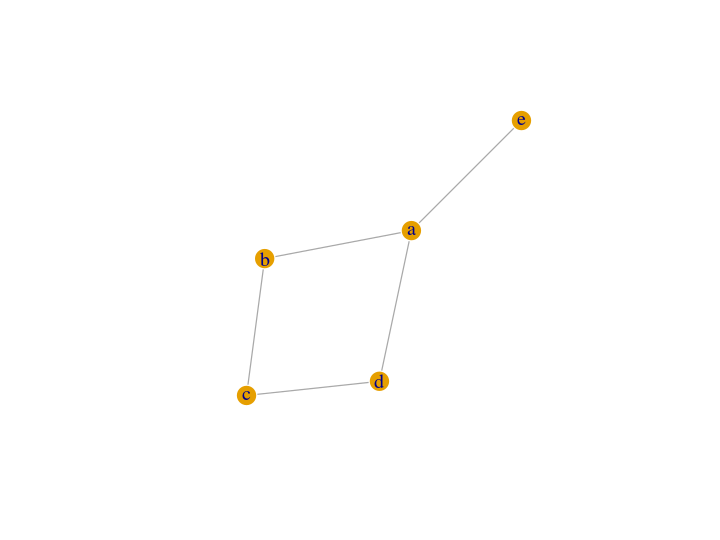

In [32]:
g <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e"), directed = FALSE)
plot(g)

Networks do not have to be _connected_. A disconnected network is one in which some nodes cannot reach certain others by any path; the network is divided into _components_. Nodes without any adjacent are said to be _isolated_.

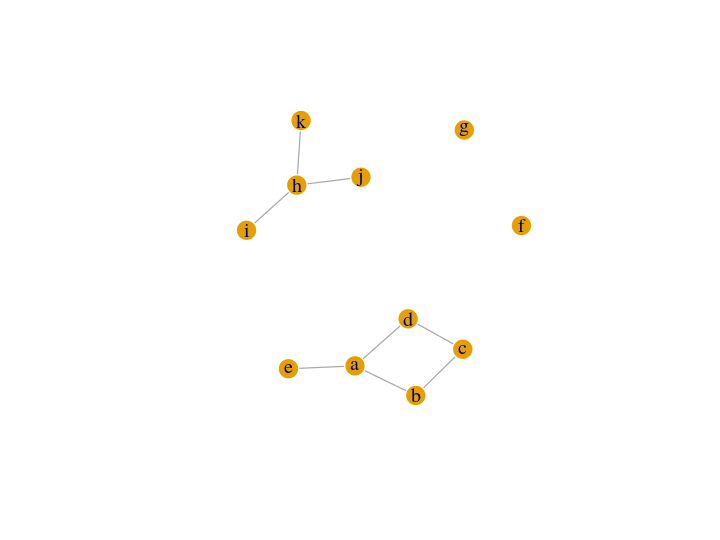

In [40]:
g <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e", "h", "i", "h", "j", "h", "k"), 
                isolates = c("f", "g"),
                directed = FALSE)
plot(g)

You can explore the graph, asking for the sets $V$, $E$.

In [41]:
V(g)
E(g)

+ 11/11 vertices, named, from 941b8a7:
 [1] a b c d e h i j k f g

+ 8/8 edges from 941b8a7 (vertex names):
[1] a--b b--c a--d c--d a--e h--i h--j h--k

Given a vertex $u$ we can loo at its _adjacents_ or _adjacency set orlist_
$$
A(u) = \{v \in V(G) : (u, v) \in E\}.
$$
Take "a" in our example:

In [43]:
adjacent_vertices(g, "a")

$a
+ 3/11 vertices, named, from 941b8a7:
[1] b d e


A graph is completely determined by $V$ and the adjacency sets $A(u)$ for each $u \in V$

```r
as_adj_list(graph, mode = c("all", "out", "in", "total"))
```

In [38]:
as_adj_list(g)  

$a
+ 3/5 vertices, named, from 1e44cee:
[1] b d e

$b
+ 2/5 vertices, named, from 1e44cee:
[1] a c

$c
+ 2/5 vertices, named, from 1e44cee:
[1] b d

$d
+ 2/5 vertices, named, from 1e44cee:
[1] a c

$e
+ 1/5 vertex, named, from 1e44cee:
[1] a


Take node "a", from its adjacency list we can build the following vector 

In [46]:
g["a", ]

a b c d e h i j k f g 
0 1 0 1 1 0 0 0 0 0 0

Putting all vectors together, for each node in $G$, we get a very important matrix, which completely determines $G$: the _adjacency matrix_.

###### Def. (Adjacency Matrix)
Given a graph $G = (V, E)$ with $N = |V|$ vertices, which can be labeled from $1, \dots, N$.
The adjacency matrix $A$ of $G$ is defined as
$A = \{a_{ij}\}_{i,j=1}^{N}$, where its elements are
$$a_{ij} = 
\begin{cases}
1 & (i, j) \in V \\
0 & \text{otherwise}
\end{cases}$$

```r
as_adjacency_matrix(graph, type = c("both", "upper", "lower"), attr = NULL, 
                    edges = FALSE, names = TRUE, sparse = igraph_opt("sparsematrices"))
```

In [7]:
g[] # equivalently: as_adjacency_matrix(g)

   [[ suppressing 11 column names ‘a’, ‘b’, ‘c’ ... ]]


11 x 11 sparse Matrix of class "dgCMatrix"
                       
a . 1 . 1 1 . . . . . .
b 1 . 1 . . . . . . . .
c . 1 . 1 . . . . . . .
d 1 . 1 . . . . . . . .
e 1 . . . . . . . . . .
h . . . . . . 1 1 1 . .
i . . . . . 1 . . . . .
j . . . . . 1 . . . . .
k . . . . . 1 . . . . .
f . . . . . . . . . . .
g . . . . . . . . . . .

**Observation:** The adjacency matrix of $G$ is a block matrix, $G$ is not connected.

Graphs are also very stuidied as a data structure:

* graphs and trees (an undirected graph $G$ is a tree if for each $u, v \in G$ there exists a unique path connecting $u$ and $v$;
* representations of graphs: adjacency sets and lists, matrices
* search algorithms on graphs
* ...

We will now see several ways to save an igraph-graph and the other way around

```r
write_graph(graph, file, format = c("edgelist", ...), ...)
read_graph(file, format = c("edgelist", ...), ...)
```

In [48]:
as_adj_edge_list(g)
write_graph(g, "g-edge-list.txt", format = "edgelist")
# read_graph("g-edge-list.txt", format = "edgelist")

$a
+ 3/8 edges from 941b8a7 (vertex names):
[1] a--b a--d a--e

$b
+ 2/8 edges from 941b8a7 (vertex names):
[1] a--b b--c

$c
+ 2/8 edges from 941b8a7 (vertex names):
[1] b--c c--d

$d
+ 2/8 edges from 941b8a7 (vertex names):
[1] a--d c--d

$e
+ 1/8 edge from 941b8a7 (vertex names):
[1] a--e

$h
+ 3/8 edges from 941b8a7 (vertex names):
[1] h--i h--j h--k

$i
+ 1/8 edge from 941b8a7 (vertex names):
[1] h--i

$j
+ 1/8 edge from 941b8a7 (vertex names):
[1] h--j

$k
+ 1/8 edge from 941b8a7 (vertex names):
[1] h--k

$f
+ 0/8 edges from 941b8a7 (vertex names):

$g
+ 0/8 edges from 941b8a7 (vertex names):


Small networks can also be saved and build from their adjacency matrix

```r
graph_from_adjacency_matrix(adjmatrix, 
                            mode = c("directed", "undirected", "max", "min", "upper", "lower", "plus"), 
                            weighted = NULL, diag = TRUE, add.colnames = NULL, add.rownames = NA)

from_adjacency(...)
```

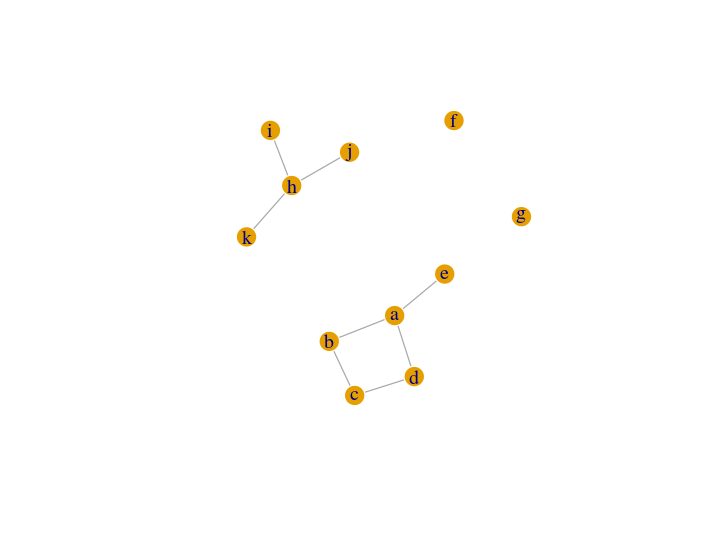

In [72]:
adj_matrix <- as_adjacency_matrix(g)
plot(graph_from_adjacency_matrix(adj_matrix, mode = "undirected"))

In order to write and read the graph using its adjacency matrix, uncomment the code in the next cell. Observe that the sparse matrix is converted to a full matrix `as.matrix(adj_matrix)`, which is usually a problem for larger networks. Alternatively use
```r
writeMM(sparse_matrix,file)
readMM(file)
```
to write/read spare matrices to/from text files; for undirected graphs it is also better to save just a triangular adjacency matrix.

**N.B.** Edge lists are preferred!

In [73]:
# save adjacency matrix, read it and build (plot) the resulting graph
# write.csv(as.matrix(adj_matrix), file = "g-adj-matrix.csv")
# plot(graph_from_adjacency_matrix(as.matrix(read.csv("g-adj-matrix.csv", row.names = 1)), mode = "undirected"))

Given a vertex $v \in V$ we can count how many edges are connected to $v$. If the graph is _simple_, i.e. no loops and no multiedges, then the number of $v$'s incident edges is equal to the length of its adjacency list. This is a key number and it is called the _degree_ of vertex $v$.

###### Def. (degree)

The _degree_ $k_i$ of a vertex $i \in G$ is the number of edges incident to $i$. Given $A$ the adjacency matrix of $G$ 
$$k_i = \sum_j a_{ij}.$$

###### Degree distribution.

Given vertex $i \in G$ we can ask what is the probability of its degree being exactly $k$ and this is given by
$$P(k_i = k) = \frac{n_k}{N}$$
where $n_k$ is the number of nodes having degree $k$.

It is then possible to look at frequency distribution, which is called _degree distribution_.

In [75]:
k_g <- degree(g)
k_g
degree_distribution(g)

a b c d e h i j k f g 
3 2 2 2 1 3 1 1 1 0 0

[1] 0.1818182 0.3636364 0.2727273 0.1818182

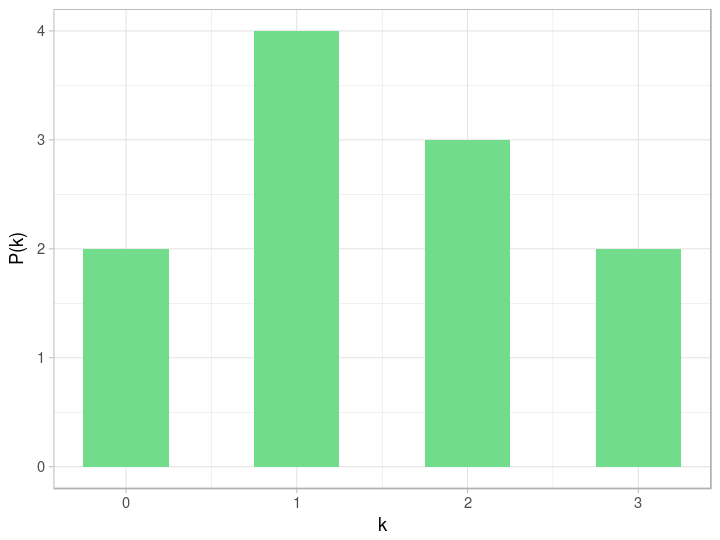

In [96]:
data <- data.frame(node = names(k_g), deg = k_g)
N <- length(V(g))
ggplot(data = data, aes(x = deg)) + 
  geom_bar(stat = "count", width = .5, fill = mygreen) +
  labs(x = "k", y = "P(k)")

##### Weighted Graphs

A graph $G = (V, E)$ can also be _weighted_ if we provide a weight function $w: V \times V \to \mathbb{R}$. Let the nodes of $G$ be labeled $1, \dots, N = |V|$ then we write $w_{ij} = w(i, j)$ and $w_{i, j} = 0$ if $(i, j) \notin E$.

In particular 

* if $G$ is undirected the weight function satisfies $w_{ij} = w_{ji}$
* if $G$ is unweighted we can still think of $w$, in which case 
$$w_{ij} = \begin{cases} 1 & (i, j) \in E \\ 0 & (i, j) \notin E. \end{cases} $$

An example of weighted undirected graph is the well-known [Zachary's Karate Club Network](https://www.jstor.org/stable/3629752), often use as a toy model for checking new methods and metrics.  

In [10]:
library(igraphdata)
data(karate)

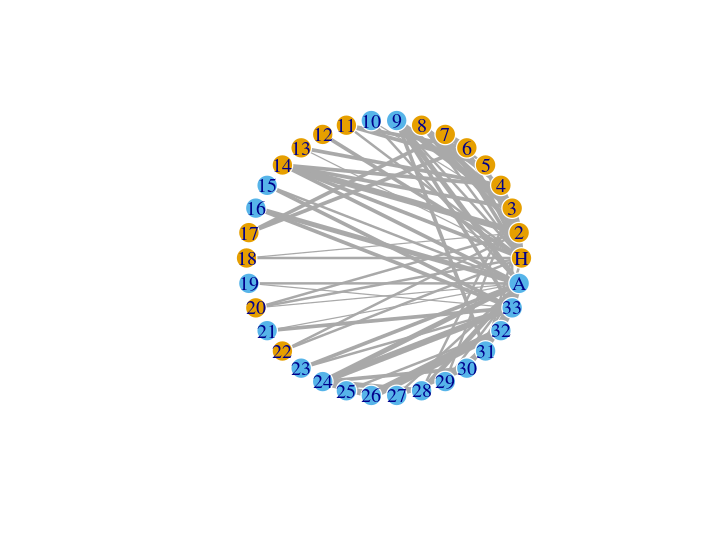

In [97]:
plot(karate, layout = layout_in_circle, edge.width = E(karate)$weight)

By default `karate` nodes are plotted in different colours, reflecting the two factions in this social network. We will see it in detail in the **Community Detection** module.

In [12]:
karate[]

   [[ suppressing 34 column names ‘Mr Hi’, ‘Actor 2’, ‘Actor 3’ ... ]]


34 x 34 sparse Matrix of class "dgCMatrix"
                                                                            
Mr Hi    . 4 5 3 3 3 3 2 2 . 2 3 1 3 . . . 2 . 2 . 2 . . . . . . . . . 2 . .
Actor 2  4 . 6 3 . . . 4 . . . . . 5 . . . 1 . 2 . 2 . . . . . . . . 2 . . .
Actor 3  5 6 . 3 . . . 4 5 1 . . . 3 . . . . . . . . . . . . . 2 2 . . . 2 .
Actor 4  3 3 3 . . . . 3 . . . . 3 3 . . . . . . . . . . . . . . . . . . . .
Actor 5  3 . . . . . 2 . . . 3 . . . . . . . . . . . . . . . . . . . . . . .
Actor 6  3 . . . . . 5 . . . 3 . . . . . 3 . . . . . . . . . . . . . . . . .
Actor 7  3 . . . 2 5 . . . . . . . . . . 3 . . . . . . . . . . . . . . . . .
Actor 8  2 4 4 3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Actor 9  2 . 5 . . . . . . . . . . . . . . . . . . . . . . . . . . . 3 . 3 4
Actor 10 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
Actor 11 2 . . . 3 3 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Actor 12 3 . . . . . . . . . . . 

**Observations.** 

* Nodes are called "actors" in social network analysis and edges are usually referred to as "ties".
* Entries of the adjacency matrix are now weights $a_{ij} = w_{ij}$.
* The [karate club network](https://www.jstor.org/stable/3629752) is undirected, indeed the adjacency matrix is symmetric:

In [13]:
isSymmetric(as.matrix(karate[]))

[1] TRUE

The _degree_ becomes then a weighted degree $$k_i = \sum_j w_{ij}.$$

We can also build the degree matrix $D$, a diagonal $N \times N$ matrix having $d_{ii} = k_i$ on the diagonal.

### 1.2 The Laplacian of a Graph

A very important matrix in network science is the graph's Laplacian matrix $L$, also called admittance or Kirchhoff matrix, together with its _normalised_ counterpart $\textbf{L}$. 
The main reference for the following paragraphs is [Chung, 1997](https://goo.gl/5wh715), a classic book in Spectral graph theory; the first chapther can be found [here](http://www.cs.ucsb.edu/~veronika/MAE/lecturesspectralgraphtheory_chung.pdf).

###### Def. (Graph's Laplacian)

Let $G$ be a weighted undirected graph such that $w$ is not-negative. Then the Laplacian matrix $L$ is a square $N \times N$ matrix defined as
\begin{equation}
    l_{ij} =
    \begin{cases}
    k_i - w_{ii} & \text{if } i = j \\
    - w_{ij} & \text{if } i \neq j \\
    0 & \text{otherwise}
    \end{cases}
\end{equation}
note that $L = D - A$, where $D$ and $A$ are respectively the degree and the adjacency matrices.

In [14]:
Lg <- laplacian_matrix(g, normalized = FALSE)
Lk <- laplacian_matrix(karate, normalized = FALSE, weights = NULL) # if NULL and the graph has an edge attribute called 
                                                                   # weight, then it will be used automatically
Lg
Lk[1:10, 1:5]

   [[ suppressing 11 column names ‘a’, ‘b’, ‘c’ ... ]]


11 x 11 sparse Matrix of class "dgCMatrix"
                                
a  3 -1  . -1 -1  .  .  .  . . .
b -1  2 -1  .  .  .  .  .  . . .
c  . -1  2 -1  .  .  .  .  . . .
d -1  . -1  2  .  .  .  .  . . .
e -1  .  .  .  1  .  .  .  . . .
h  .  .  .  .  .  3 -1 -1 -1 . .
i  .  .  .  .  . -1  1  .  . . .
j  .  .  .  .  . -1  .  1  . . .
k  .  .  .  .  . -1  .  .  1 . .
f  .  .  .  .  .  .  .  .  . 0 .
g  .  .  .  .  .  .  .  .  . . 0

10 x 5 sparse Matrix of class "dgCMatrix"
         Mr Hi Actor 2 Actor 3 Actor 4 Actor 5
Mr Hi       42      -4      -5      -3      -3
Actor 2     -4      29      -6      -3       .
Actor 3     -5      -6      33      -3       .
Actor 4     -3      -3      -3      18       .
Actor 5     -3       .       .       .       8
Actor 6     -3       .       .       .       .
Actor 7     -3       .       .       .      -2
Actor 8     -2      -4      -4      -3       .
Actor 9     -2       .      -5       .       .
Actor 10     .       .      -1       .       .

#### *Laplacian as an Operator

In particular $L$ can be seen as an **operator** on the space of functions $f: V \to \mathbb{R}$.
Indeed let $v^i: V \to \mathbb{R}$ such that $v^i(v_j) = 1$ if $i=j$ and zero otherwise. Then $\{v^1, \dots, v^N\}$ forms a basis of the vector space of all functions from $V$ to $\mathbb{R}$ and every other function $g$ can be written as $g = \sum_i g_i v^i$ and it can be thought as a column vector.

The operator $L$ satisfies
\begin{align}
  Lf(v_i) & = (k_i - w_{ii}) f(v) - \sum_j w_{ij} f(v_j)\\
  & = \sum_{j} w_{ij} \left( f(v_i) - f(v_j) \right) 
\end{align}

and if $G$ is unweighted previous equation can be rewritten as
\begin{equation}
    Lf(v_i) = C \sum_{j} \left( f(v_i) - f(v_j) \right) a_{ij}
\end{equation}
a diffusion operator with diffusion constant $C$.

Indicating with $\langle f, g \rangle = \sum_i f(v_i)g(v_i)$ the standard scalar product in $\mathbb{R}^N$, we also have
\begin{align}
  \langle f, Lf \rangle & = \sum_{i} f(v_i) \sum_{i, j} w_{ij} \left( f(v_i) - f(v_j) \right) \\
  & = \sum_{i, j} w_{ij} \left( f(v_i)^2 - f(v_i)f(v_j) + f(v_j)^2\right) \\
  & = \sum_{i, j} w_{ij} \left( f(v_i) - f(v_j)\right)^2
\end{align}

#### Normalised Laplacian

Often with "Laplacian" one refers to the normalised matrix $\textbf{L}$.

##### Def. (Normalised Laplacian)
$\textbf{L}$ is defined as
\begin{equation}
    \textbf{l}_{ij} =
    \begin{cases}
    1 - \frac{w_{ii}}{k_i} & \text{if } i = j \\
    - \frac{w_{ih}}{\sqrt{k_i k_j}} & \text{if } i \neq j \text{ and } e_{ij} \in E \\
    0 & \text{otherwise}
    \end{cases}
\end{equation}
and it can be written as $\textbf{L}=D^{-\frac12} L D^{-\frac12}$, with the convention that $D^{-1}(v, v) = 0$ if $k_v=0$, i.e. $v$ is an isolated node.

Further $\textbf{L}=D^{-\frac12} L D^{-\frac12} = D^{-\frac12} (D - A) D^{-\frac12} = I - D^{-\frac12} A D^{-\frac12}$.
Observe that a _regular_ graph, that is an undirected graph with each vertex having the same degree $k$, last equation reduces to $I - \frac{1}{k} A$.

In [15]:
Lng <- laplacian_matrix(g, normalized = TRUE)
Lnk <- laplacian_matrix(karate, normalized = TRUE)
Lng
Lnk[1:10, 1:5]

   [[ suppressing 11 column names ‘a’, ‘b’, ‘c’ ... ]]


11 x 11 sparse Matrix of class "dgCMatrix"
                                                                        
a  1.0000000 -0.4082483  .   -0.4082483 -0.5773503  .          .        
b -0.4082483  1.0000000 -0.5  .          .          .          .        
c  .         -0.5000000  1.0 -0.5000000  .          .          .        
d -0.4082483  .         -0.5  1.0000000  .          .          .        
e -0.5773503  .          .    .          1.0000000  .          .        
h  .          .          .    .          .          1.0000000 -0.5773503
i  .          .          .    .          .         -0.5773503  1.0000000
j  .          .          .    .          .         -0.5773503  .        
k  .          .          .    .          .         -0.5773503  .        
f  .          .          .    .          .          .          .        
g  .          .          .    .          .          .          .        
                           
a  .          .         . .
b  .          .         .

10 x 5 sparse Matrix of class "dgCMatrix"
               Mr Hi    Actor 2    Actor 3    Actor 4    Actor 5
Mr Hi     1.00000000 -0.1146137 -0.1343038 -0.1091089 -0.1636634
Actor 2  -0.11461365  1.0000000 -0.1939525 -0.1313064  .        
Actor 3  -0.13430383 -0.1939525  1.0000000 -0.1230915  .        
Actor 4  -0.10910895 -0.1313064 -0.1230915  1.0000000  .        
Actor 5  -0.16366342  .          .          .          1.0000000
Actor 6  -0.12371791  .          .          .          .        
Actor 7  -0.12838815  .          .          .         -0.1961161
Actor 8  -0.08559210 -0.2060105 -0.1931218 -0.1961161  .        
Actor 9  -0.07484812  .         -0.2111002  .          .        
Actor 10  .           .         -0.1005038  .          .        

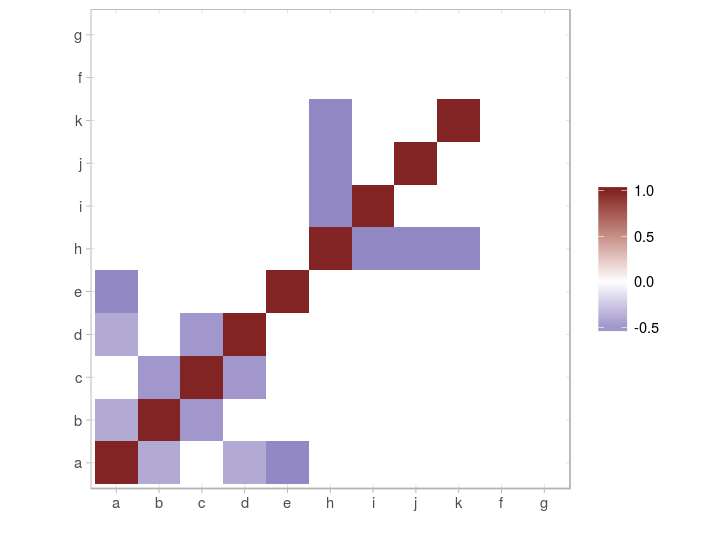

In [103]:
melted_Lng <- melt(as.matrix(Lng))
ggplot(data = melted_Lng, aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() +
  coord_equal() +
  scale_fill_gradient2(low = scales::muted("blue"), mid = "white", high = scales::muted("red")) + 
  labs(x = "", y = "", fill = "")

### 1.3 Random Walks and Graphs